In [1]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Cargar archivo desde equipo
Naples = pd.read_csv("Datos_limpios_Naples.csv")
Naples = Naples.drop(['Unnamed: 0'], axis=1)
# Naples

1) host_response_time

1.	host_response_time
•	host_acceptance_rate
•	host_is_superhost
•	number_of_reviews

In [1690]:
print(Naples["host_response_time"].unique())

['Sin especificar' 'within a few hours' 'within an hour'
 'a few days or more' 'within a day']


In [3]:
# Convertir host_response_time a dicotomica
Naples["host_response_time"] = Naples["host_response_time"].replace({
    "within an hour": "Rápido",
    "within a few hours": "Rápido",
    "within a day": "Lento",
    "a few days or more": "Lento",
    "Sin especificar": "Lento"
})

# Verificar que la conversión fue correcta
print(Naples["host_response_time"].value_counts())

host_response_time
Rápido    7972
Lento     3055
Name: count, dtype: int64


In [1692]:
print(Naples["host_is_superhost"].unique())

['f' 'Sin especificar' 't']


In [4]:
Naples["host_is_superhost"] = Naples["host_is_superhost"].replace({"f": 0, "t": 1, "Sin especificar": 2})

C:\Users\Bondleton\AppData\Local\Temp\ipykernel_6904\1419231691.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Naples["host_is_superhost"] = Naples["host_is_superhost"].replace({"f": 0, "t": 1, "Sin especificar": 2})


In [1694]:
print(Naples["host_is_superhost"].unique())

[0 2 1]


In [5]:
# Declaramos las variables dependientes e independientes para la regresion logistica
Vars_Indep = Naples[['host_acceptance_rate', 'host_is_superhost', 'number_of_reviews']]
Var_Dep = Naples['host_response_time']

In [6]:
# Redefinimos las variables, arreglo matricial
X = Vars_Indep
y = Var_Dep

# Conjunto de entrenamienso se ingresa y da un salida con respecto 
# Dividimos  el conjunto de datos en la parte de entrenamiento (70%) y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

# Escalar todos los datos
escalar = StandardScaler()

# Para realizar el escalamiento de las variables x  tanto de entrenamiento como de prueba utilizamos 
# La y es solo do, y las dependeintes si se pueden escalar
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [7]:
# Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

# Entrenamos el modelo
algoritmo.fit(X_train, y_train)

# Realizamos las predicciones
y_pred = algoritmo.predict(X_test)
y_pred

array(['Lento', 'Rápido', 'Lento', ..., 'Lento', 'Lento', 'Rápido'],
      dtype=object)

In [8]:
# Verifico la matriz de confusion
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

# diagonal: 
# diagonal:

Matriz de Confusión:
[[ 383  544]
 [ 157 2225]]


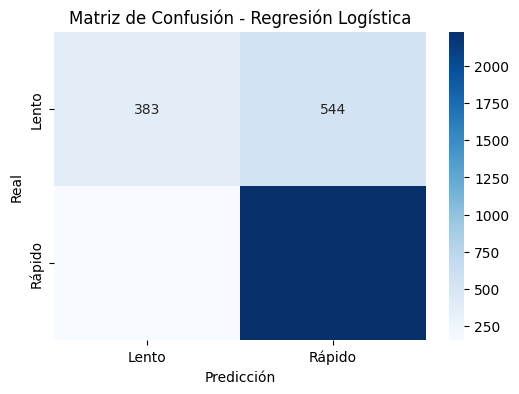

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Opcional: etiquetas si tu variable dependiente (y) tiene nombres como "Rápido" y "Lento"
labels = sorted(y.unique())  # ['Lento', 'Rápido'] si solo tienes esas dos clases

# Crear el heatmap
plt.figure(figsize=(6,4))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()


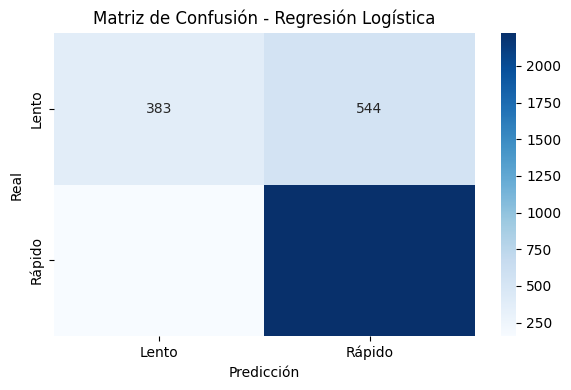

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener todas las clases posibles en y, en orden consistente
labels = sorted(y.unique())  # Por ejemplo: ['Lento', 'Rápido', 'Sin especificar']

# Crear la matriz de confusión con etiquetas explícitas
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred, labels=labels)

# Dibujar el heatmap con etiquetas en los ejes
plt.figure(figsize=(6, 4))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.tight_layout()
plt.show()


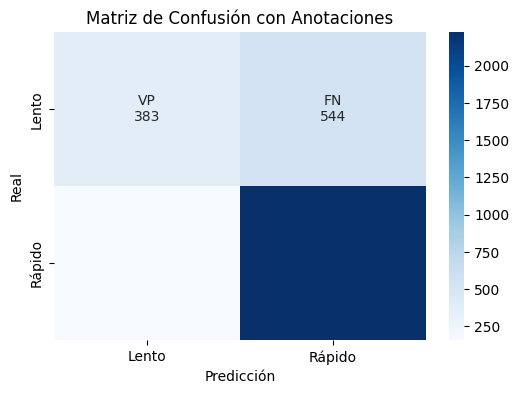

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Etiquetas de las clases (asegúrate que estén en el mismo orden que usa confusion_matrix)
labels = sorted(y.unique())  # ['Lento', 'Rápido'] por ejemplo

# Matriz de confusión
matriz = confusion_matrix(y_test, y_pred)

# Anotaciones personalizadas en la matriz
group_names = ['VP', 'FN', 'FP', 'VN'] if matriz.shape == (2, 2) else None
if group_names:
    group_counts = [f"{value}" for value in matriz.flatten()]
    box_labels = [f"{name}\n{count}" for name, count in zip(group_names, group_counts)]
    box_labels = np.asarray(box_labels).reshape(matriz.shape)
else:
    box_labels = matriz  # Por si tienes más de 2 clases, deja los valores sin etiquetas extra

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(matriz, annot=box_labels, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión con Anotaciones')
plt.show()


In [1699]:
# calculo precision del modelo 
# rapido o lento - pos_label
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="Rápido")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.8221329437545654


In [1700]:
# Calculo de la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.7993351465699607


In [1701]:
# Calculo de la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Rápido")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.9271004942339374


2) host_is_superhost

2.	host_is_superhost
•	host_response_rate
•	host_acceptance_rate
•	host_total_listings_count
•	// host_response_time

In [1702]:
# Cargar archivo desde equipo
Naples = pd.read_csv("Datos_limpios_Naples.csv")
Naples = Naples.drop(['Unnamed: 0'], axis=1)
# Naples

In [1703]:
# Verificar
print(Naples["host_is_superhost"].value_counts())

host_is_superhost
f                  7814
t                  2825
Sin especificar     388
Name: count, dtype: int64


In [1704]:
print(Naples["host_response_time"].unique())

['Sin especificar' 'within a few hours' 'within an hour'
 'a few days or more' 'within a day']


In [1705]:
# Convertir host_is_superhost a dicotomica
Naples["host_is_superhost"] = Naples["host_is_superhost"].replace({
    "Sin especificar": "f",
    # "Sin especificar": "No Superhost",
    # "f": "No Superhost",
    # "t": "Superhost"
})

# Verificar que la conversión fue correcta
print(Naples["host_is_superhost"].value_counts())

host_is_superhost
f    8202
t    2825
Name: count, dtype: int64


In [1706]:
# # Convertir host_response_time a dicotomica
# Naples["host_response_time"] = Naples["host_response_time"].replace({
#     "within an hour": 1,
#     "within a few hours": 2,
#     "within a day": 3,
#     "a few days or more": 4,
#     "Sin especificar": 5
# })

# # Verificar que la conversión fue correcta
# print(Naples["host_response_time"].value_counts())

In [1707]:
# Declaramos las variables dependientes e independientes para la regresion logistica
Vars_Indep = Naples[['host_response_rate', 'host_acceptance_rate', 'host_total_listings_count']]
Var_Dep = Naples['host_is_superhost']

In [1708]:
# Redefinimos las variables, arreglo matricial
X = Vars_Indep
y = Var_Dep

# Conjunto de entrenamienso se ingresa y da un salida con respecto 
# Dividimos  el conjunto de datos en la parte de entrenamiento (70%) y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

# Escalar todos los datos
escalar = StandardScaler()

# Para realizar el escalamiento de las variables x  tanto de entrenamiento como de prueba utilizamos 
# La y es solo do, y las dependeintes si se pueden escalar
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [1709]:
# Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

# Entrenamos el modelo
algoritmo.fit(X_train, y_train)

# Realizamos las predicciones
y_pred = algoritmo.predict(X_test)
y_pred

array(['f', 'f', 'f', ..., 'f', 'f', 'f'], dtype=object)

In [1710]:
# Verifico la matriz de confusion
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

# diagonal: 
# diagonal:

Matriz de Confusión:
[[2458    0]
 [ 851    0]]


In [1711]:
# calculo precision del modelo 
# super o no super - pos_label
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="f")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.7428226050166213


In [1712]:
# Calculo de la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.7428226050166213


In [1713]:
# Calculo de la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="f")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
1.0


3) beds

3.	beds
•	Accommodates
•	Bedrooms
•	Room_type

In [1714]:
# Cargar archivo desde equipo
Naples = pd.read_csv("Datos_limpios_Naples.csv")
Naples = Naples.drop(['Unnamed: 0'], axis=1)
# Naples

In [1715]:
print(Naples["beds"].unique())

[1.  2.  3.  2.2 2.1 6.  4.  5.  0. ]


In [1716]:
# Convertir host_is_superhost a dicotomica
Naples["beds"] = Naples["beds"].replace({
    0: "Sin cama",
    6: "Con cama",
    5: "Con cama",
    4: "Con cama",
    3: "Con cama",
    2.2: "Con cama",
    2.1: "Con cama",
    2: "Con cama",  
    1: "Con cama"

    # 0: "f",
    # 6: "t",
    # 5: "t",
    # 4: "t",
    # 3: "t",
    # 2.2: "t",
    # 2.1: "t",
    # 2: "t",
    # 1: "t",
})

# Verificar que la conversión fue correcta
print(Naples["beds"].value_counts())

beds
Con cama    10778
Sin cama      249
Name: count, dtype: int64


In [1717]:
print(Naples["room_type"].unique())

['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']


In [1718]:
# Convertir room_type a binario (Privado vs. Compartido)
Naples["room_type"] = Naples["room_type"].replace({
    "Entire home/apt": 0,  # Privado
    "Private room": 1,      # Privado
    "Shared room": 2,       # Compartido
    "Hotel room": 3         # Compartido
})

# Confirmar conversión
print(Naples["room_type"].value_counts())  

room_type
0    7195
1    3621
3     128
2      83
Name: count, dtype: int64


C:\Users\Bondleton\AppData\Local\Temp\ipykernel_29284\2653028822.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Naples["room_type"] = Naples["room_type"].replace({


In [1719]:
# Declaramos las variables dependientes e independientes para la regresion logistica
Vars_Indep = Naples[['accommodates', 'bedrooms', 'room_type']]
Var_Dep = Naples['beds']

In [1720]:
# Redefinimos las variables, arreglo matricial
X = Vars_Indep
y = Var_Dep

# Conjunto de entrenamienso se ingresa y da un salida con respecto 
# Dividimos  el conjunto de datos en la parte de entrenamiento (70%) y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

# Escalar todos los datos
escalar = StandardScaler()

# Para realizar el escalamiento de las variables x  tanto de entrenamiento como de prueba utilizamos 
# La y es solo do, y las dependeintes si se pueden escalar
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [1721]:
# Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

# Entrenamos el modelo
algoritmo.fit(X_train, y_train)

# Realizamos las predicciones
y_pred = algoritmo.predict(X_test)
y_pred

array(['Con cama', 'Con cama', 'Con cama', ..., 'Con cama', 'Con cama',
       'Con cama'], dtype=object)

In [1722]:
# Verifico la matriz de confusion
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

# diagonal: 
# diagonal:

Matriz de Confusión:
[[3232    0]
 [  77    0]]


In [1723]:
# calculo precision del modelo 
# con cama o sin cama - pos_label
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="Con cama")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.976730129948625


In [1724]:
# Calculo de la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.976730129948625


In [1725]:
# Calculo de la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Con cama")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
1.0


4) host_has_profile_pic

4.	host_has_profile_pic
•	host_listings_count
•	host_verifications
•	Host_is_superhost

In [1726]:
# Cargar archivo desde equipo
Naples = pd.read_csv("Datos_limpios_Naples.csv")
Naples = Naples.drop(['Unnamed: 0'], axis=1)
# Naples

In [1727]:
print(Naples["host_has_profile_pic"].unique())

['t' 'f']


In [1728]:
# # Convertir host_has_profile_pic a dicotomica
# Naples["host_has_profile_pic"] = Naples["host_has_profile_pic"].replace({
#     "t": "Con foto",
#     "f": "Sin foto",
# })

# # Verificar que la conversión fue correcta
print(Naples["host_has_profile_pic"].value_counts())

host_has_profile_pic
t    9997
f    1030
Name: count, dtype: int64


In [1729]:
# Convertir host_verifications a dicotomica
Naples["host_verifications"] = Naples["host_verifications"].replace({
    "['email', 'phone']": 5, # Verificado = 1
    "['email', 'phone', 'work_email']": 4,
    "['phone']": 3,
    "['email']": 2,
    "['phone', 'work_email']": 1,
    "[]": 0, # No verificado = 0
})

# Verificar que la conversión fue correcta
print(Naples["host_verifications"].value_counts())

host_verifications
5    9342
3    1193
4     468
2      11
0       7
1       6
Name: count, dtype: int64


C:\Users\Bondleton\AppData\Local\Temp\ipykernel_29284\2773881076.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Naples["host_verifications"] = Naples["host_verifications"].replace({


In [1730]:
# Convertir host_is_superhost a dicotomica
Naples["host_is_superhost"] = Naples["host_is_superhost"].replace({
    "Sin especificar": "2",
    "f": "0",
    "t": "1"
})

# Verificar que la conversión fue correcta
print(Naples["host_is_superhost"].value_counts())

host_is_superhost
0    7814
1    2825
2     388
Name: count, dtype: int64


In [1731]:
# Declaramos las variables dependientes e independientes para la regresion logistica
Vars_Indep = Naples[['host_listings_count', 'host_verifications', 'host_is_superhost']]
Var_Dep = Naples['host_has_profile_pic']

In [1732]:
# Redefinimos las variables, arreglo matricial
X = Vars_Indep
y = Var_Dep

# Conjunto de entrenamienso se ingresa y da un salida con respecto 
# Dividimos  el conjunto de datos en la parte de entrenamiento (70%) y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

# Escalar todos los datos
escalar = StandardScaler()

# Para realizar el escalamiento de las variables x  tanto de entrenamiento como de prueba utilizamos 
# La y es solo do, y las dependeintes si se pueden escalar
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [1733]:
# Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

# Entrenamos el modelo
algoritmo.fit(X_train, y_train)

# Realizamos las predicciones
y_pred = algoritmo.predict(X_test)
y_pred

array(['t', 't', 't', ..., 't', 't', 't'], dtype=object)

In [1734]:
# Verifico la matriz de confusion
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

# diagonal: 
# diagonal:

Matriz de Confusión:
[[   1  274]
 [   4 3030]]


In [1735]:
# calculo precision del modelo 

from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="t")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.9170702179176755


In [1736]:
# Calculo de la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.9159867029313992


In [1737]:
# Calculo de la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="t")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.998681608437706


5) host_identity_verified

5.	host_identity_verified
•	Host_is_superhost
•	review_scores_communication
•	review_scores_rating

In [1738]:
# Cargar archivo desde equipo
Naples = pd.read_csv("Datos_limpios_Naples.csv")
Naples = Naples.drop(['Unnamed: 0'], axis=1)
# Naples

In [1739]:
print(Naples["host_is_superhost"].unique())

['f' 'Sin especificar' 't']


In [1740]:
# Convertir host_is_superhost a dicotomica
Naples["host_is_superhost"] = Naples["host_is_superhost"].replace({
    "Sin especificar": 2,
    "f": 0,
    "t": 1
})

# Verificar que la conversión fue correcta
print(Naples["host_is_superhost"].value_counts())

host_is_superhost
0    7814
1    2825
2     388
Name: count, dtype: int64


C:\Users\Bondleton\AppData\Local\Temp\ipykernel_29284\1183087986.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Naples["host_is_superhost"] = Naples["host_is_superhost"].replace({


In [1741]:
# Declaramos las variables dependientes e independientes para la regresion logistica
Vars_Indep = Naples[['host_is_superhost', 'review_scores_communication', 'review_scores_rating']]
Var_Dep = Naples['host_identity_verified']

In [1742]:
# Redefinimos las variables, arreglo matricial
X = Vars_Indep
y = Var_Dep

# Conjunto de entrenamienso se ingresa y da un salida con respecto 
# Dividimos  el conjunto de datos en la parte de entrenamiento (70%) y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

# Escalar todos los datos
escalar = StandardScaler()

# Para realizar el escalamiento de las variables x  tanto de entrenamiento como de prueba utilizamos 
# La y es solo do, y las dependeintes si se pueden escalar
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [1743]:
# Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

# Entrenamos el modelo
algoritmo.fit(X_train, y_train)

# Realizamos las predicciones
y_pred = algoritmo.predict(X_test)
y_pred

array(['t', 't', 't', ..., 't', 't', 't'], dtype=object)

In [1744]:
# Verifico la matriz de confusion
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

# diagonal: 
# diagonal:

Matriz de Confusión:
[[   0  230]
 [   0 3079]]


In [1745]:
# calculo precision del modelo 

from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="t")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.9304925959504382


In [1746]:
# Calculo de la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.9304925959504382


In [1747]:
# Calculo de la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="t")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
1.0


6) room_type

6.	room_type
•	property_type
•	accommodates
•	price

In [1748]:
# Cargar archivo desde equipo
Naples = pd.read_csv("Datos_limpios_Naples.csv")
Naples = Naples.drop(['Unnamed: 0'], axis=1)
# Naples

In [1749]:
print(Naples["price"].unique())

[ 71.   76.   68.   58.   60.   42.   93.3 117.6  90.  100.   91.   35.
  99.  103.   75.   62.   70.   80.  105.  140.   55.  124.   85.   53.
  82.  110.   46.   40.  159.  120.  109.  126.   20.  102.   89.  183.
  94.   83.   61.   63.   57.   78.  127.   65.   50.   74.  160.  187.
 145.   48.   95.  164.   43.  113.   73.   86.  139.   64.  175.  144.
 119.  148.  190.   72.   30.  123.  135.   92.   38.  153.   47.   67.
  45.   93.  114.   97.   66.   59.   96.  150.   28.   31.  118.  104.
 193.   39.  156.  106.   22.  180.   79.  128.  151.   81.   84.   23.
 107.  162.  101.  147.  167.  132.  115.  166.   88.   27.  174.  130.
  69.  170.   33.  178.   52.   77.  161.   54.  158.   87.   37.   98.
 125.  122.  186.  169.  179.  108.  117.   56.  195.  177.  129.  116.
  36.  134.  111.  168.   13.  194.   18.  112.  121.   51.   26.  146.
  34.  184.  141.  155.   49.  131.  137.  163.  173.   32.  149.  133.
  29.  136.   44.  191.  152.   21.  142.  154.  189.  188.  143

In [1750]:
# Convertir room_type a binario (Privado vs. Compartido)
Naples["room_type"] = Naples["room_type"].replace({
    "Entire home/apt": "Privado",  # Privado
    "Private room": "Compartido",      # Privado
    "Shared room": "Compartido",       # Compartido
    "Hotel room": "Compartido"        # Compartido
})

# Confirmar conversión
print(Naples["room_type"].value_counts())  

room_type
Privado       7195
Compartido    3832
Name: count, dtype: int64


In [1751]:
# Crear diccionario con valores numéricos para cada tipo de propiedad
Naples["property_type"] = Naples["property_type"].replace({
    'Private room in bed and breakfast': 1,
    'Private room in condo': 2,
    'Entire rental unit': 3,
    'Private room in rental unit': 4,
    'Entire loft': 5,
    'Entire cottage': 6,
    'Entire home': 7,
    'Room in bed and breakfast': 8,
    'Entire condo': 9,
    'Shared room in hostel': 10,
    'Room in boutique hotel': 11,
    'Entire vacation home': 12,
    'Entire villa': 13,
    'Private room in home': 14,
    'Entire serviced apartment': 15,
    'Entire townhouse': 16,
    'Private room in hostel': 17,
    'Private room': 18,
    'Entire bed and breakfast': 19,
    'Private room in villa': 20,
    'Entire guesthouse': 21,
    'Room in hostel': 22,
    'Boat': 23,
    'Tiny home': 24,
    'Dome': 25,
    'Room in hotel': 26,
    'Shared room in bed and breakfast': 27,
    'Entire guest suite': 28,
    'Room in serviced apartment': 29,
    'Private room in vacation home': 30,
    'Shared room in rental unit': 31,
    'Shared room in condo': 32,
    'Private room in serviced apartment': 33,
    'Entire place': 34,
    'Private room in guest suite': 35,
    'Private room in tiny home': 36,
    'Private room in townhouse': 37,
    'Private room in boat': 38,
    'Private room in loft': 39,
    'Earthen home': 40,
    'Dammuso': 41,
    'Shared room in home': 42,
    'Houseboat': 43,
    'Private room in guesthouse': 44,
    'Private room in casa particular': 45,
    'Camper/RV': 46,
    'Castle': 47,
    'Casa particular': 48,
    'Entire home/apt': 49,
    'Farm stay': 50,
    'Private room in farm stay': 51,
    'Room in aparthotel': 52,
    'Tent': 53
})

# Confirmar conversión
print(Naples["property_type"].value_counts())  

property_type
3     4095
1     1690
9     1366
4     1093
7      921
12     451
2      311
14     142
5      110
8      102
24     102
11      99
30      66
15      58
33      57
26      54
31      42
44      39
35      28
28      23
27      20
13      17
29      17
10      14
23      13
18      11
48      10
45       9
21       9
39       7
36       6
42       4
37       4
17       4
51       3
20       3
32       3
52       3
22       2
43       2
38       2
34       2
16       2
19       2
41       1
40       1
6        1
46       1
47       1
49       1
50       1
25       1
53       1
Name: count, dtype: int64


C:\Users\Bondleton\AppData\Local\Temp\ipykernel_29284\3781815957.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Naples["property_type"] = Naples["property_type"].replace({


In [1752]:
# Declaramos las variables dependientes e independientes para la regresion logistica
Vars_Indep = Naples[['property_type', 'accommodates', 'price']]
Var_Dep = Naples['room_type']

In [1753]:
# Redefinimos las variables, arreglo matricial
X = Vars_Indep
y = Var_Dep

# Conjunto de entrenamienso se ingresa y da un salida con respecto 
# Dividimos  el conjunto de datos en la parte de entrenamiento (70%) y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

# Escalar todos los datos
escalar = StandardScaler()

# Para realizar el escalamiento de las variables x  tanto de entrenamiento como de prueba utilizamos 
# La y es solo do, y las dependeintes si se pueden escalar
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [1754]:
# Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

# Entrenamos el modelo
algoritmo.fit(X_train, y_train)

# Realizamos las predicciones
y_pred = algoritmo.predict(X_test)
y_pred

array(['Privado', 'Compartido', 'Compartido', ..., 'Compartido',
       'Compartido', 'Privado'], dtype=object)

In [1755]:
# Verifico la matriz de confusion
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

# diagonal: 
# diagonal:

Matriz de Confusión:
[[ 736  408]
 [ 443 1722]]


In [1756]:
# calculo precision del modelo 
# con cama o sin cama - pos_label
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="Compartido")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.6242578456318915


In [1757]:
# Calculo de la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.7428226050166213


In [1758]:
# Calculo de la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Compartido")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.6433566433566433


7) has_availability

7.	has_availability
•	price
•	availability_365
•	number_of_reviews

In [1807]:
# Cargar archivo desde equipo
Naples = pd.read_csv("Datos_limpios_Naples.csv")
Naples = Naples.drop(['Unnamed: 0'], axis=1)
# Naples

In [1760]:
print(Naples["has_availability"].unique()) 

['t' 'Sin especificar' 'f']


In [1808]:
# Convertir
Naples["has_availability"] = Naples["has_availability"].replace({
    "t": "Disponible",
    "f": "No disponible",
    "Sin especificar": "No disponible",
})

# Verificar que la conversión fue correcta
print(Naples["has_availability"].value_counts())

has_availability
Disponible       10994
No disponible       33
Name: count, dtype: int64


In [1809]:
# Declaramos las variables dependientes e independientes para la regresion logistica
Vars_Indep = Naples[['price', 'availability_365', 'number_of_reviews']]
Var_Dep = Naples['has_availability']

In [1810]:
# Redefinimos las variables, arreglo matricial
X = Vars_Indep
y = Var_Dep

# Conjunto de entrenamienso se ingresa y da un salida con respecto 
# Dividimos  el conjunto de datos en la parte de entrenamiento (70%) y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

# Escalar todos los datos
escalar = StandardScaler()

# Para realizar el escalamiento de las variables x  tanto de entrenamiento como de prueba utilizamos 
# La y es solo do, y las dependeintes si se pueden escalar
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [1811]:
# Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

# Entrenamos el modelo
algoritmo.fit(X_train, y_train)

# Realizamos las predicciones
y_pred = algoritmo.predict(X_test)
y_pred

array(['Disponible', 'Disponible', 'Disponible', ..., 'Disponible',
       'Disponible', 'Disponible'], dtype=object)

In [1812]:
# Verifico la matriz de confusion
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

# diagonal: 
# diagonal:

Matriz de Confusión:
[[3300    0]
 [   9    0]]


In [1813]:
# calculo precision del modelo 

from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="Disponible")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.9972801450589301


In [1814]:
# Calculo de la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.9972801450589301


In [1815]:
# Calculo de la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Disponible")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
1.0


8) instant_bookable

8.	instant_bookable
•	maximum_nights
•	minimum_nights
•	host_response_time

In [1816]:
# Cargar archivo desde equipo
Naples = pd.read_csv("Datos_limpios_Naples.csv")
Naples = Naples.drop(['Unnamed: 0'], axis=1)
# Naples

In [1817]:
print(Naples["host_response_time"].unique())

['Sin especificar' 'within a few hours' 'within an hour'
 'a few days or more' 'within a day']


In [1818]:
# Convertir host_response_time a dicotomica
Naples["host_response_time"] = Naples["host_response_time"].replace({
    "within an hour": 1,
    "within a few hours": 2,
    "within a day": 3,
    "a few days or more": 4,
    "Sin especificar": 5
})

# Verificar que la conversión fue correcta
print(Naples["host_response_time"].value_counts())

host_response_time
1    7330
5    2468
2     642
3     393
4     194
Name: count, dtype: int64


C:\Users\Bondleton\AppData\Local\Temp\ipykernel_29284\2485131506.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Naples["host_response_time"] = Naples["host_response_time"].replace({


In [1819]:
# Declaramos las variables dependientes e independientes para la regresion logistica
Vars_Indep = Naples[['maximum_nights', 'minimum_nights', 'host_response_time']]
Var_Dep = Naples['instant_bookable']

In [1820]:
# Redefinimos las variables, arreglo matricial
X = Vars_Indep
y = Var_Dep

# Conjunto de entrenamienso se ingresa y da un salida con respecto 
# Dividimos  el conjunto de datos en la parte de entrenamiento (70%) y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

# Escalar todos los datos
escalar = StandardScaler()

# Para realizar el escalamiento de las variables x  tanto de entrenamiento como de prueba utilizamos 
# La y es solo do, y las dependeintes si se pueden escalar
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [1821]:
# Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

# Entrenamos el modelo
algoritmo.fit(X_train, y_train)

# Realizamos las predicciones
y_pred = algoritmo.predict(X_test)
y_pred

array(['t', 't', 't', ..., 't', 't', 't'], dtype=object)

In [1822]:
# Verifico la matriz de confusion
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

# diagonal: 
# diagonal:

Matriz de Confusión:
[[ 433  991]
 [ 315 1570]]


In [1823]:
# calculo precision del modelo 
# rapido o lento - pos_label
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="f")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.5788770053475936


In [1824]:
# Calculo de la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.6053188274403143


In [1825]:
# Calculo de la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="f")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.30407303370786515


9) bedrooms

9.	bedrooms
•	room_type
•	bathrooms
•	beds

In [1826]:
# Cargar archivo desde equipo
Naples = pd.read_csv("Datos_limpios_Naples.csv")
Naples = Naples.drop(['Unnamed: 0'], axis=1)
# Naples

In [1806]:
print(Naples["bedrooms"].unique())

[1.  3.  1.4 2.  1.3 0. ]


In [1827]:
# Convertir bedrooms a dicotomica
Naples["bedrooms"] = Naples["bedrooms"].replace({
    0: "De 0 a 1 recamara",
    1: "De 0 a 1 recamara",
    1.3: "De 0 a 1 recamara",
    1.4: "De 0 a 1 recamara",
    2: "De 2 a 3 recamaras",
    3: "De 2 a 3 recamaras"
})

# Verificar que la conversión fue correcta
print(Naples["bedrooms"].value_counts())

bedrooms
De 0 a 1 recamara     8181
De 2 a 3 recamaras    2846
Name: count, dtype: int64


In [1828]:
# Convertir room_type a binario (Privado vs. Compartido)
Naples["room_type"] = Naples["room_type"].replace({
    "Entire home/apt": 1,  # Privado
    "Private room": 2,      # Privado
    "Shared room": 3,       # Compartido
    "Hotel room": 4         # Compartido
})

# Confirmar conversión
print(Naples["room_type"].value_counts())  

room_type
1    7195
2    3621
4     128
3      83
Name: count, dtype: int64


C:\Users\Bondleton\AppData\Local\Temp\ipykernel_29284\12446977.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Naples["room_type"] = Naples["room_type"].replace({


In [1829]:
# Declaramos las variables dependientes e independientes para la regresion logistica
Vars_Indep = Naples[['room_type', 'bathrooms', 'beds']]
Var_Dep = Naples['bedrooms']

In [1830]:
# Redefinimos las variables, arreglo matricial
X = Vars_Indep
y = Var_Dep

# Conjunto de entrenamienso se ingresa y da un salida con respecto 
# Dividimos  el conjunto de datos en la parte de entrenamiento (70%) y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

# Escalar todos los datos
escalar = StandardScaler()

# Para realizar el escalamiento de las variables x  tanto de entrenamiento como de prueba utilizamos 
# La y es solo do, y las dependeintes si se pueden escalar
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [1831]:
# Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

# Entrenamos el modelo
algoritmo.fit(X_train, y_train)

# Realizamos las predicciones
y_pred = algoritmo.predict(X_test)
y_pred

array(['De 0 a 1 recamara', 'De 0 a 1 recamara', 'De 0 a 1 recamara', ...,
       'De 0 a 1 recamara', 'De 0 a 1 recamara', 'De 0 a 1 recamara'],
      dtype=object)

In [1832]:
# Verifico la matriz de confusion
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

# diagonal: 
# diagonal:

Matriz de Confusión:
[[2342   87]
 [ 616  264]]


In [1833]:
# calculo precision del modelo 
# con cuarto o sin cuarto - pos_label
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="De 0 a 1 recamara")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.7917511832319134


In [1788]:
# Calculo de la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.9821698398307646


In [1834]:
# Calculo de la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="De 0 a 1 recamara")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.9641827912721285


10) minimum_nights

10.	minimum_nights
•	price
•	room_type
•	availability_365

In [1835]:
# Cargar archivo desde equipo
Naples = pd.read_csv("Datos_limpios_Naples.csv")
Naples = Naples.drop(['Unnamed: 0'], axis=1)
# Naples

In [1836]:
print(Naples["room_type"].unique())

['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']


In [1837]:
# Convertir minimum_nights a dicotomica
Naples["minimum_nights"] = Naples["minimum_nights"].replace({
    1: "Noche",
    1.5: "Noche",
    2: "Noches",
    3: "Noches"
})

# Verificar que la conversión fue correcta
print(Naples["minimum_nights"].value_counts())

minimum_nights
Noche     6072
Noches    4955
Name: count, dtype: int64


In [1838]:
# Convertir room_type a binario (Privado vs. Compartido)
Naples["room_type"] = Naples["room_type"].replace({
    "Entire home/apt": 1,  # Privado
    "Private room": 2,      # Privado
    "Shared room": 3,       # Compartido
    "Hotel room": 4         # Compartido
})

# Confirmar conversión
print(Naples["room_type"].value_counts())  

room_type
1    7195
2    3621
4     128
3      83
Name: count, dtype: int64


C:\Users\Bondleton\AppData\Local\Temp\ipykernel_29284\12446977.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Naples["room_type"] = Naples["room_type"].replace({


In [1839]:
# Declaramos las variables dependientes e independientes para la regresion logistica
Vars_Indep = Naples[['price', 'room_type', 'availability_365']]
Var_Dep = Naples['minimum_nights']

In [1840]:
# Redefinimos las variables, arreglo matricial
X = Vars_Indep
y = Var_Dep

# Conjunto de entrenamienso se ingresa y da un salida con respecto 
# Dividimos  el conjunto de datos en la parte de entrenamiento (70%) y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

# Escalar todos los datos
escalar = StandardScaler()

# Para realizar el escalamiento de las variables x  tanto de entrenamiento como de prueba utilizamos 
# La y es solo do, y las dependeintes si se pueden escalar
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [1841]:
# Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

# Entrenamos el modelo
algoritmo.fit(X_train, y_train)

# Realizamos las predicciones
y_pred = algoritmo.predict(X_test)
y_pred

array(['Noches', 'Noche', 'Noches', ..., 'Noche', 'Noches', 'Noches'],
      dtype=object)

In [1842]:
# Verifico la matriz de confusion
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

# diagonal: 
# diagonal:

Matriz de Confusión:
[[ 990  889]
 [ 395 1035]]


In [1843]:
# calculo precision del modelo 
# con cuarto o sin cuarto - pos_label
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="Noche")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.7148014440433214


In [1844]:
# Calculo de la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.6119673617407072


In [1845]:
# Calculo de la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Noches")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.7237762237762237
